In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
%matplotlib inline

In [3]:
G = nx.Graph()

origin = (0,0)
p0 = (1,0)
p1 = (np.cos(np.pi/3),np.sin(np.pi/3))
p2 = (np.cos(2*np.pi/3),np.sin(2*np.pi/3))
p3 = (np.cos(3*np.pi/3),np.sin(3*np.pi/3))
p4 = (np.cos(4*np.pi/3),np.sin(4*np.pi/3))
p5 = (np.cos(5*np.pi/3),np.sin(5*np.pi/3))
nodes = [p0,p1,p2,p3,p4,p5]

nodes = [p0,p1,p2,p3,p4,p5]
i=0
G.add_node(i,pos=origin,center=True)
i +=1 
for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

origin = 1.5, np.cos(np.pi/6)
p1 = (origin[0] + np.cos(np.pi/3), origin[1] + np.sin(np.pi/3))
p2 = (origin[0] + np.cos(2*np.pi/3), origin[1] + np.sin(2*np.pi/3))

nodes = [p1,p2]

G.add_node(i,pos=origin,center=True)
i +=1

for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

origin = 1.5, -np.cos(np.pi/6)
p4 = (origin[0] + np.cos(4*np.pi/3), origin[1] + np.sin(4*np.pi/3))
p5 = (origin[0] + np.cos(5*np.pi/3), origin[1] + np.sin(5*np.pi/3))
nodes = [p4,p5]

G.add_node(i,pos=origin,center=True)
i+=1

for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1
    
origin = 1.5*2, 0
p0 = (origin[0] + 1, origin[1] + 0)
p1 = (origin[0] + np.cos(np.pi/3), origin[1] + np.sin(np.pi/3))
p2 = (origin[0] + np.cos(2*np.pi/3), origin[1] + np.sin(2*np.pi/3))
p3 = (origin[0] + np.cos(3*np.pi/3), origin[1] + np.sin(3*np.pi/3))
p4 = (origin[0] + np.cos(4*np.pi/3), origin[1] + np.sin(4*np.pi/3))
p5 = (origin[0] + np.cos(5*np.pi/3), origin[1] + np.sin(5*np.pi/3))
nodes = [p0,p1,p2,p3,p4,p5]

G.add_node(i,pos=origin,center=True)
i+=1

for node in nodes:
    G.add_node(i,pos=node,center=False)
    i += 1

In [4]:
def unit_vector(A,B):
    # Calculate the unit vector from A to B 

    dist = distance.euclidean(A,B)

    return ((B[0]-A[0])/dist,(B[1]-A[1])/dist)

def calc_force(l, myosin,b):

    return 10*(l-1) + b*myosin

def d_pos(position,force,dt):

    x_new = position[0] + (dt/const.eta)*force[0]

    y_new = position[1] + (dt/const.eta)*force[1]

    return (x_new,y_new)

In [5]:
G.add_path([1,2,3,4,5,6,1],beta=0,myosin=0)
G.add_path([1,17,16,8,9,2],beta=0,myosin=0)
G.add_path([6,11,12,18,17,1],beta=0,myosin=0)
G.add_path([18,19,14,15,16],beta=0,myosin=0)
G.add_edges_from([(0,1),(0,2),(0,3),(0,4),(0,5),(0,6)],beta=10,myosin=1000)
G.add_edges_from([(7,16),(7,8),(7,9),(7,2),(7,1),(7,17)],beta=10,myosin=1000)
G.add_edges_from([(10,18),(10,17),(10,1),(10,6),(10,11),(10,12)],beta=10,myosin=1000)
G.add_edges_from([(13,14),(13,15),(13,16),(13,17),(13,18),(13,19)],beta=10,myosin=1000)

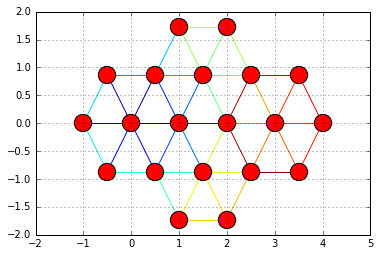

In [6]:
pos = nx.get_node_attributes(G,'pos')

nx.draw_networkx_nodes(G,pos,with_labels=True)
nx.draw_networkx_edges(G,pos,edge_color=range(len(G.edges())))
plt.xlim(-2,5)
plt.ylim(-2,2)
plt.axis("on")
plt.grid("on")

plt.show()

In [7]:
list(G.nodes(data=True))

[(0, {'center': True, 'pos': (0, 0)}),
 (1, {'center': False, 'pos': (1, 0)}),
 (2, {'center': False, 'pos': (0.50000000000000011, 0.8660254037844386)}),
 (3, {'center': False, 'pos': (-0.49999999999999978, 0.86602540378443871)}),
 (4, {'center': False, 'pos': (-1.0, 1.2246467991473532e-16)}),
 (5, {'center': False, 'pos': (-0.50000000000000044, -0.86602540378443837)}),
 (6, {'center': False, 'pos': (0.50000000000000011, -0.8660254037844386)}),
 (7, {'center': True, 'pos': (1.5, 0.86602540378443871)}),
 (8, {'center': False, 'pos': (2.0, 1.7320508075688772)}),
 (9, {'center': False, 'pos': (1.0000000000000002, 1.7320508075688774)}),
 (10, {'center': True, 'pos': (1.5, -0.86602540378443871)}),
 (11, {'center': False, 'pos': (0.99999999999999956, -1.7320508075688772)}),
 (12, {'center': False, 'pos': (2.0, -1.7320508075688772)}),
 (13, {'center': True, 'pos': (3.0, 0)}),
 (14, {'center': False, 'pos': (4.0, 0)}),
 (15, {'center': False, 'pos': (3.5, 0.8660254037844386)}),
 (16, {'center'

In [8]:
for spoke in list(G.neighbors(0)):
    G[0][spoke]['myosin'] = G[0][spoke]['myosin']+10

In [9]:
list(G.edges(data=True))

[(0, 1, {'beta': 10, 'myosin': 1010}),
 (0, 2, {'beta': 10, 'myosin': 1010}),
 (0, 3, {'beta': 10, 'myosin': 1010}),
 (0, 4, {'beta': 10, 'myosin': 1010}),
 (0, 5, {'beta': 10, 'myosin': 1010}),
 (0, 6, {'beta': 10, 'myosin': 1010}),
 (1, 17, {'beta': 0, 'myosin': 0}),
 (1, 2, {'beta': 0, 'myosin': 0}),
 (1, 6, {'beta': 0, 'myosin': 0}),
 (1, 7, {'beta': 10, 'myosin': 1000}),
 (1, 10, {'beta': 10, 'myosin': 1000}),
 (2, 3, {'beta': 0, 'myosin': 0}),
 (2, 7, {'beta': 10, 'myosin': 1000}),
 (2, 9, {'beta': 0, 'myosin': 0}),
 (3, 4, {'beta': 0, 'myosin': 0}),
 (4, 5, {'beta': 0, 'myosin': 0}),
 (5, 6, {'beta': 0, 'myosin': 0}),
 (6, 10, {'beta': 10, 'myosin': 1000}),
 (6, 11, {'beta': 0, 'myosin': 0}),
 (7, 16, {'beta': 10, 'myosin': 1000}),
 (7, 17, {'beta': 10, 'myosin': 1000}),
 (7, 8, {'beta': 10, 'myosin': 1000}),
 (7, 9, {'beta': 10, 'myosin': 1000}),
 (8, 16, {'beta': 0, 'myosin': 0}),
 (8, 9, {'beta': 0, 'myosin': 0}),
 (10, 17, {'beta': 10, 'myosin': 1000}),
 (10, 18, {'beta': 10

In [10]:
H = nx.Graph()

In [11]:
H = G.copy()

In [12]:
list(H.nodes(data=True))

[(0, {'center': True, 'pos': (0, 0)}),
 (1, {'center': False, 'pos': (1, 0)}),
 (2, {'center': False, 'pos': (0.50000000000000011, 0.8660254037844386)}),
 (3, {'center': False, 'pos': (-0.49999999999999978, 0.86602540378443871)}),
 (4, {'center': False, 'pos': (-1.0, 1.2246467991473532e-16)}),
 (5, {'center': False, 'pos': (-0.50000000000000044, -0.86602540378443837)}),
 (6, {'center': False, 'pos': (0.50000000000000011, -0.8660254037844386)}),
 (7, {'center': True, 'pos': (1.5, 0.86602540378443871)}),
 (8, {'center': False, 'pos': (2.0, 1.7320508075688772)}),
 (9, {'center': False, 'pos': (1.0000000000000002, 1.7320508075688774)}),
 (10, {'center': True, 'pos': (1.5, -0.86602540378443871)}),
 (11, {'center': False, 'pos': (0.99999999999999956, -1.7320508075688772)}),
 (12, {'center': False, 'pos': (2.0, -1.7320508075688772)}),
 (13, {'center': True, 'pos': (3.0, 0)}),
 (14, {'center': False, 'pos': (4.0, 0)}),
 (15, {'center': False, 'pos': (3.5, 0.8660254037844386)}),
 (16, {'center'

In [13]:
H.node[5]['pos']=(-1,-1)
G.node[5]['pos']

(-0.50000000000000044, -0.86602540378443837)

In [14]:
list(G.nodes(data=True))

[(0, {'center': True, 'pos': (0, 0)}),
 (1, {'center': False, 'pos': (1, 0)}),
 (2, {'center': False, 'pos': (0.50000000000000011, 0.8660254037844386)}),
 (3, {'center': False, 'pos': (-0.49999999999999978, 0.86602540378443871)}),
 (4, {'center': False, 'pos': (-1.0, 1.2246467991473532e-16)}),
 (5, {'center': False, 'pos': (-0.50000000000000044, -0.86602540378443837)}),
 (6, {'center': False, 'pos': (0.50000000000000011, -0.8660254037844386)}),
 (7, {'center': True, 'pos': (1.5, 0.86602540378443871)}),
 (8, {'center': False, 'pos': (2.0, 1.7320508075688772)}),
 (9, {'center': False, 'pos': (1.0000000000000002, 1.7320508075688774)}),
 (10, {'center': True, 'pos': (1.5, -0.86602540378443871)}),
 (11, {'center': False, 'pos': (0.99999999999999956, -1.7320508075688772)}),
 (12, {'center': False, 'pos': (2.0, -1.7320508075688772)}),
 (13, {'center': True, 'pos': (3.0, 0)}),
 (14, {'center': False, 'pos': (4.0, 0)}),
 (15, {'center': False, 'pos': (3.5, 0.8660254037844386)}),
 (16, {'center'

In [15]:
for spoke in H.edges_iter():
    if H.edge[spoke[0]][spoke[1]]['beta'] == 0:
        print(spoke)

(1, 17)
(1, 2)
(1, 6)
(2, 3)
(2, 9)
(3, 4)
(4, 5)
(5, 6)
(6, 11)
(8, 16)
(8, 9)
(11, 12)
(12, 18)
(14, 19)
(14, 15)
(15, 16)
(16, 17)
(17, 18)
(18, 19)


In [16]:
graphs = [G,H]
print(type(graphs[-1]))

<class 'networkx.classes.graph.Graph'>


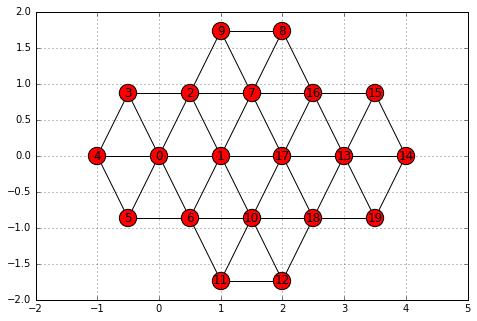

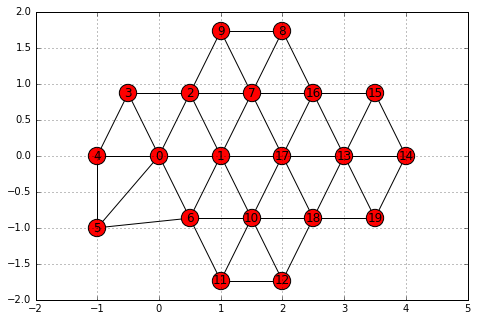

In [17]:
for graph in graphs:
    pos = nx.get_node_attributes(graph,'pos')

    nx.draw(graph,pos,with_labels=True)
    plt.xlim(-2,5)
    plt.ylim(-2,2)
    plt.axis("on")
    plt.grid("on")

    plt.show()

In [18]:
G.node[0]['pos']

(0, 0)

In [19]:
list(H.nodes(data=True))
list(G.edges(data=True))

[(0, 1, {'beta': 10, 'myosin': 1010}),
 (0, 2, {'beta': 10, 'myosin': 1010}),
 (0, 3, {'beta': 10, 'myosin': 1010}),
 (0, 4, {'beta': 10, 'myosin': 1010}),
 (0, 5, {'beta': 10, 'myosin': 1010}),
 (0, 6, {'beta': 10, 'myosin': 1010}),
 (1, 17, {'beta': 0, 'myosin': 0}),
 (1, 2, {'beta': 0, 'myosin': 0}),
 (1, 6, {'beta': 0, 'myosin': 0}),
 (1, 7, {'beta': 10, 'myosin': 1000}),
 (1, 10, {'beta': 10, 'myosin': 1000}),
 (2, 3, {'beta': 0, 'myosin': 0}),
 (2, 7, {'beta': 10, 'myosin': 1000}),
 (2, 9, {'beta': 0, 'myosin': 0}),
 (3, 4, {'beta': 0, 'myosin': 0}),
 (4, 5, {'beta': 0, 'myosin': 0}),
 (5, 6, {'beta': 0, 'myosin': 0}),
 (6, 10, {'beta': 10, 'myosin': 1000}),
 (6, 11, {'beta': 0, 'myosin': 0}),
 (7, 16, {'beta': 10, 'myosin': 1000}),
 (7, 17, {'beta': 10, 'myosin': 1000}),
 (7, 8, {'beta': 10, 'myosin': 1000}),
 (7, 9, {'beta': 10, 'myosin': 1000}),
 (8, 16, {'beta': 0, 'myosin': 0}),
 (8, 9, {'beta': 0, 'myosin': 0}),
 (10, 17, {'beta': 10, 'myosin': 1000}),
 (10, 18, {'beta': 10

In [20]:
for edge in G.edges_iter(data=True):
    if edge[2]['beta'] != 0:
        print(G.node[edge[0]])

{'center': True, 'pos': (0, 0)}
{'center': True, 'pos': (0, 0)}
{'center': True, 'pos': (0, 0)}
{'center': True, 'pos': (0, 0)}
{'center': True, 'pos': (0, 0)}
{'center': True, 'pos': (0, 0)}
{'center': False, 'pos': (1, 0)}
{'center': False, 'pos': (1, 0)}
{'center': False, 'pos': (0.50000000000000011, 0.8660254037844386)}
{'center': False, 'pos': (0.50000000000000011, -0.8660254037844386)}
{'center': True, 'pos': (1.5, 0.86602540378443871)}
{'center': True, 'pos': (1.5, 0.86602540378443871)}
{'center': True, 'pos': (1.5, 0.86602540378443871)}
{'center': True, 'pos': (1.5, 0.86602540378443871)}
{'center': True, 'pos': (1.5, -0.86602540378443871)}
{'center': True, 'pos': (1.5, -0.86602540378443871)}
{'center': True, 'pos': (1.5, -0.86602540378443871)}
{'center': True, 'pos': (1.5, -0.86602540378443871)}
{'center': True, 'pos': (3.0, 0)}
{'center': True, 'pos': (3.0, 0)}
{'center': True, 'pos': (3.0, 0)}
{'center': True, 'pos': (3.0, 0)}
{'center': True, 'pos': (3.0, 0)}
{'center': True

In [21]:
len(G.neighbors(0)) >= len(G.neighbors(1))

True

In [22]:
for center in G.nodes_iter(data=True):
    if center[1]['center']==True:
        for neighbor in G.neighbors(center[0]):
            print(G[center[0]][neighbor]['myosin'])
            G[center[0]][neighbor]['myosin'] = 20
            print(distance.euclidean(G.node[center[0]]['pos'],G.node[neighbor]['pos']))
G.edges(data=True)            

1010
1.0
1010
1.0
1010
0.9999999999999999
1010
1.0
1010
1.0
1010
1.0
1000
1.0
1000
1.0
1000
0.9999999999999999
1000
1.0
1000
0.9999999999999999
1000
0.9999999999999999
1000
1.0000000000000002
1000
0.9999999999999996
1000
0.9999999999999999
1000
1.0
1000
1.0
1000
0.9999999999999999
1000
1.0
1000
1.0
1000
1.0
1000
1.0
1000
1.0
1000
1.0


[(0, 1, {'beta': 10, 'myosin': 20}),
 (0, 2, {'beta': 10, 'myosin': 20}),
 (0, 3, {'beta': 10, 'myosin': 20}),
 (0, 4, {'beta': 10, 'myosin': 20}),
 (0, 5, {'beta': 10, 'myosin': 20}),
 (0, 6, {'beta': 10, 'myosin': 20}),
 (1, 17, {'beta': 0, 'myosin': 0}),
 (1, 2, {'beta': 0, 'myosin': 0}),
 (1, 6, {'beta': 0, 'myosin': 0}),
 (1, 7, {'beta': 10, 'myosin': 20}),
 (1, 10, {'beta': 10, 'myosin': 20}),
 (2, 3, {'beta': 0, 'myosin': 0}),
 (2, 7, {'beta': 10, 'myosin': 20}),
 (2, 9, {'beta': 0, 'myosin': 0}),
 (3, 4, {'beta': 0, 'myosin': 0}),
 (4, 5, {'beta': 0, 'myosin': 0}),
 (5, 6, {'beta': 0, 'myosin': 0}),
 (6, 10, {'beta': 10, 'myosin': 20}),
 (6, 11, {'beta': 0, 'myosin': 0}),
 (7, 16, {'beta': 10, 'myosin': 20}),
 (7, 17, {'beta': 10, 'myosin': 20}),
 (7, 8, {'beta': 10, 'myosin': 20}),
 (7, 9, {'beta': 10, 'myosin': 20}),
 (8, 16, {'beta': 0, 'myosin': 0}),
 (8, 9, {'beta': 0, 'myosin': 0}),
 (10, 17, {'beta': 10, 'myosin': 20}),
 (10, 18, {'beta': 10, 'myosin': 20}),
 (10, 11, {'

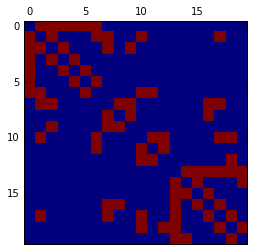

In [23]:
plt.matshow(nx.adjacency_matrix(G).A)
plt.show()

In [25]:
# iterate over all nodes in graph
for point in G.nodes_iter():
    # iterate over all neighbors of node
    total_force = [0,0]
    for neighbor in G.neighbors(point):
        # calculate the unit vector from node to neighbor
        dir_vector = unit_vector(G.node[point]['pos'],G.node[neighbor]['pos'])
        # calculate magnitude of force
        length = distance.euclidean(G.node[point]['pos'],G.node[neighbor]['pos'])
        mag_force = calc_force(length,G[point][neighbor]['myosin'],G[point][neighbor]['beta'])
        total_force = np.sum([total_force,mag_force*np.array(dir_vector)],axis=0)
    # update location using force

        